Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 9s 84ms/step - loss: 0.1788 - val_loss: 0.1699
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.1678 - val_loss: 0.1566
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.1529 - val_loss: 0.1384
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.1338 - val_loss: 0.1180
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1135 - val_loss: 0.0996
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0962 - val_loss: 0.0861
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0834 - val_loss: 0.0765
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0755 - val_loss: 0.0707
Epoch 9/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0698 - val_loss: 0.0667
Epoch 10/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.0662 - val_loss: 0.0630
Epoch 11/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 0.0623 - val_loss: 0.0597
Epoch 12/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.0593 - val_loss: 0.0564
E

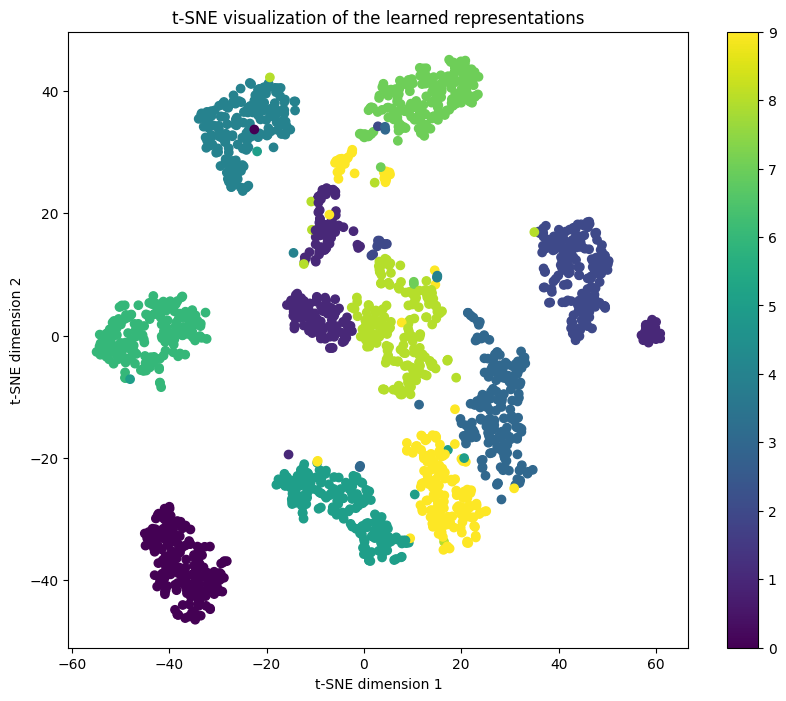

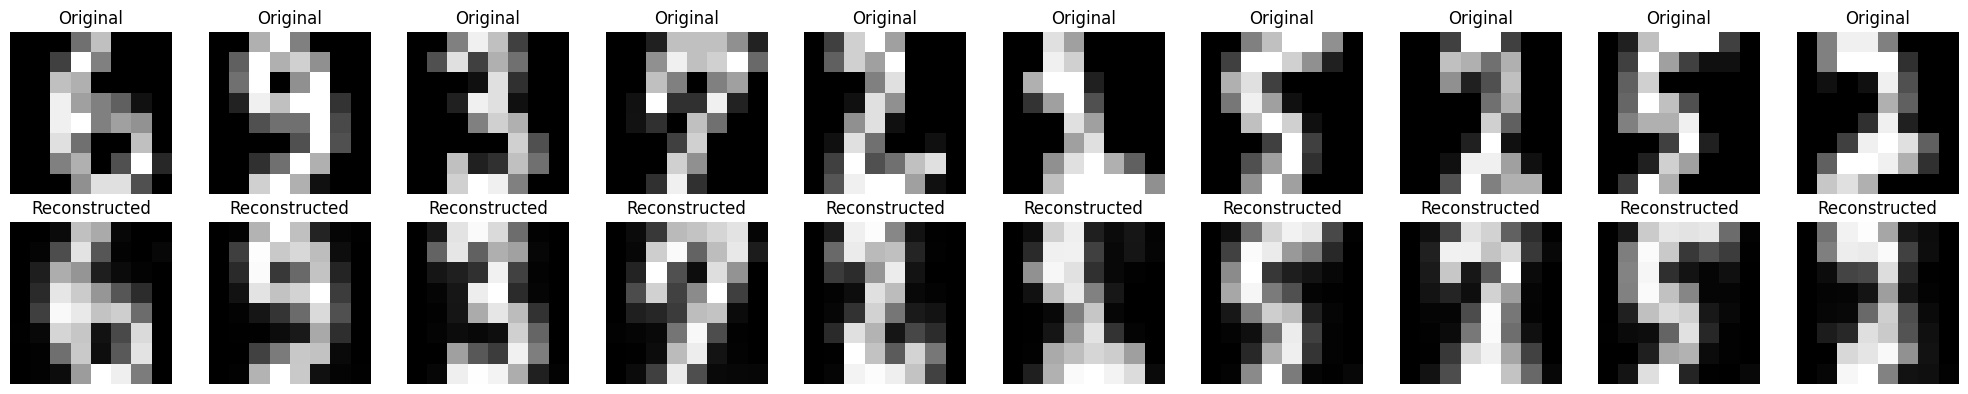

In [ ]:
''' program 7
Train a DBM for real-valued data representation.
Use any dataset & Evaluate the quality of learned representations.'''

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.manifold import TSNE
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input

# Load and preprocess data
digits = load_digits()
X = digits.data.astype('float32')
y = digits.target

# Normalize data between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1))
X_scaled = scaler.fit_transform(X)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define a simple autoencoder as an approximation of a DBM
input_dim = X_train.shape[1]
encoding_dim = 32  # Size of the encoded representation

# Define the encoder
input_layer = Input(shape=(input_dim,))
encoder = Dense(64, activation='relu')(input_layer)
encoder = Dense(encoding_dim, activation='relu')(encoder)

# Define the decoder
decoder = Dense(64, activation='relu')(encoder)
decoder = Dense(input_dim, activation='sigmoid')(decoder)

# Define the autoencoder model
autoencoder = Model(inputs=input_layer, outputs=decoder)
encoder_model = Model(inputs=input_layer, outputs=encoder)

# Compile the model
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = autoencoder.fit(
    X_train, X_train,
    epochs=50,
    batch_size=256,
    shuffle=True,
    validation_data=(X_test, X_test)
)

# Evaluate reconstruction quality
X_pred = autoencoder.predict(X_test)
mse = mean_squared_error(X_test, X_pred)
print(f"Mean squared error on test data: {mse:.4f}")

# Generate encodings for visualization
encoded_data = encoder_model.predict(X_scaled)

# Visualize the learned representations with t-SNE
tsne = TSNE(n_components=2, random_state=42)
encoded_tsne = tsne.fit_transform(encoded_data)

# Plot the t-SNE visualization
plt.figure(figsize=(10, 8))
scatter = plt.scatter(encoded_tsne[:, 0], encoded_tsne[:, 1], c=y, cmap='viridis')
plt.colorbar(scatter)
plt.title('t-SNE visualization of the learned representations')
plt.xlabel('t-SNE dimension 1')
plt.ylabel('t-SNE dimension 2')
plt.show()

# Visualize original vs reconstructed digits
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_test[i].reshape(8, 8), cmap='gray')
    plt.title("Original")
    plt.axis('off')

    # Reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(X_pred[i].reshape(8, 8), cmap='gray')
    plt.title("Reconstructed")
    plt.axis('off')

plt.tight_layout()
plt.show()